In [10]:
import pyzx as zx

In [11]:
# Create a new circuit for Steane code encoder
steane = zx.Circuit(7)

# Add Hadamard gates to qubits 3,5,6
steane.add_gate("HAD",3)
steane.add_gate("HAD",5)
steane.add_gate("HAD",6)

# Add CNOT gates for encoding
steane.add_gate("CNOT",3,1)
steane.add_gate("CNOT",3,2)
steane.add_gate("CNOT",5,1)
steane.add_gate("CNOT",5,4)
steane.add_gate("CNOT",6,2)
steane.add_gate("CNOT",6,4)
steane.add_gate("CNOT",0,1)
steane.add_gate("CNOT",0,2)
steane.add_gate("CNOT",0,4)

# Draw the circuit
zx.draw(steane)

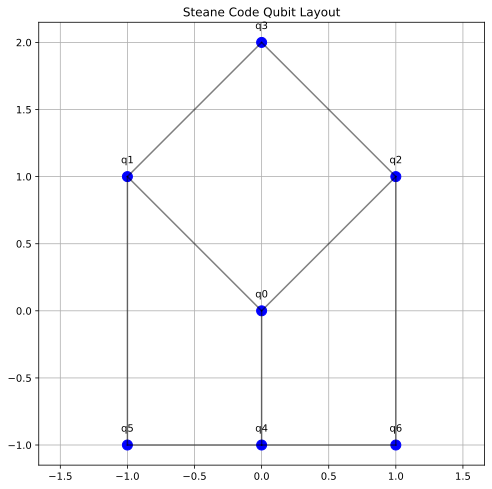

In [12]:
import matplotlib.pyplot as plt

steane = steane.to_graph()
# Define layout positions for 7 qubits in a hexagonal-like arrangement with center qubit
layout = [
    (0, 0),    # qubit 0 (center)
    (-1, 1),   # qubit 1 
    (1, 1),    # qubit 2
    (0, 2),    # qubit 3
    (0, -1),   # qubit 4
    (-1, -1),  # qubit 5
    (1, -1)    # qubit 6
]

# Create a new figure
plt.figure(figsize=(8, 8))

# Plot the qubit positions
for i, pos in enumerate(layout):
    plt.plot(pos[0], pos[1], 'bo', markersize=10)  # Plot blue dots for qubits
    plt.text(pos[0], pos[1]+0.1, f'q{i}', horizontalalignment='center')  # Label qubits

# Draw lines connecting qubits according to Steane code structure
connections = [(0,1), (0,2), (0,4), (3,1), (3,2), (5,1), (5,4), (6,2), (6,4)]
for source, target in connections:
    plt.plot([layout[source][0], layout[target][0]], 
             [layout[source][1], layout[target][1]], 'k-', alpha=0.5)

# Set equal aspect ratio and add title
plt.axis('equal')
plt.title('Steane Code Qubit Layout')
plt.grid(True)
plt.show()

# Apply the layout to the circuit
steane.map_qubits(layout)
zx.draw(steane)